# Giới thiệu

<b> Kubernetes (k8s) là một hệ thống để chạy, quản lý, điều phối các ứng dụng được container hóa trên một cụm máy (1 hay nhiều) gọi là cluster </b>
 - Với Kubernetes bạn có thể cấu hình để chạy các ứng dụng, dịch vụ sao cho phù hợp nhất khi chúng tương tác với nhau cũng như với bên ngoài
 - Bạn có thể điều chỉnh tăng giảm tài nguyên, bản chạy phục vụ cho dịch vụ (scale), bạn có thể cập nhật (update), thu hồi update khi có vấn đề ...
 - Kubernetes là một công cụ mạnh mẽ, mềm dẻo, dễ mở rộng khi so sánh nó với công cụ tương tự là Docker Swarm!

<b>Sơ lược kiến trúc - các thành phần của Kubernetes</b>

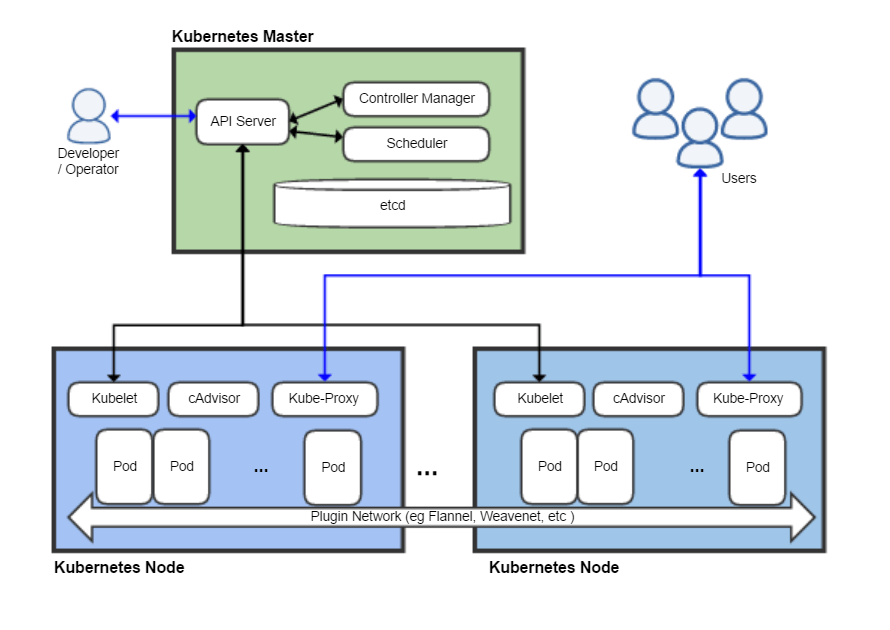
 - Master Server là máy chính của cluster, tại đây điều khiển cả cụm máy
 - etct là thành phần cơ bản cần thiết cho Kubernetes, nó lưu trữ các cấu hình chung cho cả cụm máy, etct chạy tại máy master. etct là một dự án nguồn mở, nó cung cấp dịch vụ lưu dữ liệu theo cặp key/value
 - kube-apiserver chạy tại máy master, cung cấp các API Restful để các client (như kubectl) tương tác với Kubernetes
 - kube-scheduler chạy tại master, thành phần này giúp lựa chọn Node nào để chạy các ứng dụng căn cứ vào tài nguyên và các thành phần khác sao cho hệ thống ổn định
 - kube-controller chạy tại master, nó điều khiển trạng thái cluster, tương tác để thực hiện các tác vụ tạo, xóa, cập nhật ... các tài nguyên
 - Kubelet dịch vụ chạy trên tất cả các máy (Node), nó đảm đương giám sát chạy, dừng, duy trì các ứng dụng chạy trên node của nó
 - Kube-proxy: cung cấp mạng proxy để các ứng dụng nhận được traffic từ ngoài mạng vào cluster

In [2]:
!kubectl version

Client Version: version.Info{Major:"1", Minor:"25", GitVersion:"v1.25.9", GitCommit:"a1a87a0a2bcd605820920c6b0e618a8ab7d117d4", GitTreeState:"clean", BuildDate:"2023-04-12T12:16:51Z", GoVersion:"go1.19.8", Compiler:"gc", Platform:"windows/amd64"}

Unable to connect to the server: EOF



Kustomize Version: v4.5.7


In [3]:
# Lấy thông tin Cluster
!kubectl cluster-info

Kubernetes control plane is running at https://kubernetes.docker.internal:6443
CoreDNS is running at https://kubernetes.docker.internal:6443/api/v1/namespaces/kube-system/services/kube-dns:dns/proxy

To further debug and diagnose cluster problems, use 'kubectl cluster-info dump'.


In [1]:
# Các Node có trong Cluster
!kubectl get nodes

NAME             STATUS   ROLES           AGE   VERSION
docker-desktop   Ready    control-plane   10h   v1.25.9


In [5]:
!kubectl describe node/docker-desktop

Name:               docker-desktop
Roles:              control-plane
Labels:             beta.kubernetes.io/arch=amd64
                    beta.kubernetes.io/os=linux
                    kubernetes.io/arch=amd64
                    kubernetes.io/hostname=docker-desktop
                    kubernetes.io/os=linux
                    node-role.kubernetes.io/control-plane=
                    node.kubernetes.io/exclude-from-external-load-balancers=
Annotations:        kubeadm.alpha.kubernetes.io/cri-socket: unix:///var/run/cri-dockerd.sock
                    node.alpha.kubernetes.io/ttl: 0
                    volumes.kubernetes.io/controller-managed-attach-detach: true
CreationTimestamp:  Fri, 05 May 2023 22:26:44 +0700
Taints:             <none>
Unschedulable:      false
Lease:
  HolderIdentity:  docker-desktop
  AcquireTime:     <unset>
  RenewTime:       Fri, 05 May 2023 22:39:22 +0700
Conditions:
  Type             Status  LastHeartbeatTime                 LastTransitionTime          


  cpu                850m (10%)  0 (0%)
  memory             240Mi (6%)  340Mi (9%)
  ephemeral-storage  0 (0%)      0 (0%)
  hugepages-1Gi      0 (0%)      0 (0%)
  hugepages-2Mi      0 (0%)      0 (0%)
Events:
  Type     Reason                   Age                    From             Message
  ----     ------                   ----                   ----             -------
  Normal   Starting                 2m1s                   kube-proxy       
  Normal   Starting                 11m                    kube-proxy       
  Normal   NodeHasSufficientMemory  13m (x8 over 13m)      kubelet          Node docker-desktop status is now: NodeHasSufficientMemory
  Normal   NodeHasNoDiskPressure    13m (x7 over 13m)      kubelet          Node docker-desktop status is now: NodeHasNoDiskPressure
  Normal   NodeHasSufficientPID     13m (x7 over 13m)      kubelet          Node docker-desktop status is now: NodeHasSufficientPID
  Normal   RegisteredNode           12m                    node-c

# Tạo Cluster Kubernetes hoàn chỉnh

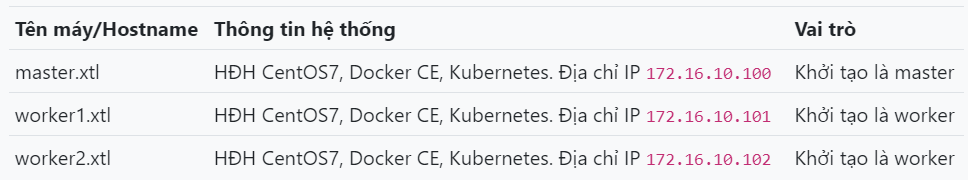

In [2]:
# Sử dụng Vagrant tạo và quản lý máy ảo Linux
!vagrant version

Installed Version: 2.3.4

Vagrant was unable to check for the latest version of Vagrant.
Please check manually at https://www.vagrantup.com


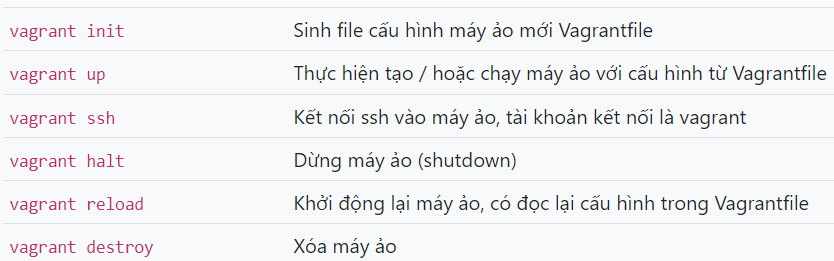

In [ ]:
# Tại thư mục kubernetes-centos7/master/ gõ lệnh vagrant để tạo máy master.xtl
!vagrant up

## Khởi tạo Cluster

In [ ]:
# tại máy master
!ssh root@172.16.10.100

In [ ]:
# khởi tạo là nút master của Cluster
!kubeadm init --apiserver-advertise-address=172.16.10.100 --pod-network-cidr=192.168.0.0/16

In [ ]:
# cài đặt một Plugin mạng: calico
!kubectl apply -f https://docs.projectcalico.org/v3.10/manifests/calico.yaml

In [ ]:
# Thông tin cluster
!kubectl cluster-info

In [ ]:
# Các node trong cluster
!kubectl get nodes

In [ ]:
# Các pod đang chạy trong tất cả các namespace
!kubectl get pods -A

# Kết nối Node Worker vào Kubernetes Cluster

In [ ]:
# Tại node master
!kubeadm token create --print-join-command

Nó cho nội dung lệnh <b>kubeadm join ... </b> thực hiện lệnh này trên các node worker thì node worker sẽ nối vào Cluster

# Cấu hình kubectl máy trạm truy cập đến các Cluster

 - Chương trình client kubectl là công cụ dòng lệnh kết nối và tương tác với các Cluster Kubernetes
 - Có thể cài đặt kubectl trên một máy không Docker, không Kubernetes với mục đích chỉ dùng nó kết nối đến hệ thống Cluster từ xa

In [1]:
# Xem nội dung cấu hình kubectl
!kubectl config view

apiVersion: v1
clusters:
- cluster:
    certificate-authority-data: DATA+OMITTED
    server: https://kubernetes.docker.internal:6443
  name: docker-desktop
contexts:
- context:
    cluster: docker-desktop
    user: docker-desktop
  name: docker-desktop
current-context: docker-desktop
kind: Config
preferences: {}
users:
- name: docker-desktop
  user:
    client-certificate-data: REDACTED
    client-key-data: REDACTED


In [ ]:
#Tại máy master, có file cấu hình cho tại /root/.kube/config, copy file cấu hình này ra lưu thành file config-mycluster (không ghi đè vào config hiện tại của máy HOST)
!scp root@172.16.10.100:/etc/kubernetes/admin.conf ~/.kube/config-mycluster

In [ ]:
#Nếu muốn yêu cầu kubectl sử dụng ngay file cấu hình nào đó, thì gán biến môi trường KUBECONFIG bằng đường dẫn file cấu hình, ví dụ sử dụng file cấu hình config-mycluster
!export KUBECONFIG=/.kube/config-mycluster

## Sử dụng các context trong cấu hình kubectl: Lưu và chuyển đổi dễ dàng các loại kết nối đến các cluster
 - Context là ngữ cảnh sử dụng, mỗi ngữ cảnh có tên trong đó có thông tin user và cluster
 - Ở file trên, mục current-context là context với tên docker-desktop, có nghĩa là kết nối đến cluster có tên docker-desktop với user là docker-desktop

In [ ]:
# kết hợp 2 file: config và config-mycluster thành 1 và lưu trở lại config.
!export KUBECONFIG=~/.kube/config:~/.kube/config-mycluster
!kubectl config view --flatten > ~/.kube/config_temp
!mv ~/.kube/config_temp ~/.kube/config

In [2]:
#Như vậy trong file cấu hình đã có các ngữ cảnh khác nhau để sử dụng, đóng terminal và mở lại rồi gõ lệnh, có các ngữ cảnh nào
!kubectl config get-contexts

In [ ]:
#Nếu muốn chuyển làm việc sang context có tên kubernetes-admin@kubernetes (nối với cluster mới tạo ở trên) thì gõ lệnh
!kubectl config use-context kubernetes-admin@kubernetes